Mount google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Install keras

In [ ]:
! pip install -q keras

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Colab Notebooks/tomato/train'
valid_path = '/content/drive/MyDrive/Colab Notebooks/tomato/val'

In [ ]:
rn50 = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94773248/94765736 [==============================] - 0s 0us/step


In [ ]:
for layer in rn50.layers:
    layer.trainable = False

In [ ]:
folders = glob('/content/drive/MyDrive/Colab Notebooks/tomato/train/*')

In [ ]:
folders

['/content/drive/MyDrive/Colab Notebooks/tomato/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 '/content/drive/MyDrive/Colab Notebooks/tomato/train/Tomato___Early_blight',
 '/content/drive/MyDrive/Colab Notebooks/tomato/train/Tomato___Bacterial_spot',
 '/content/drive/MyDrive/Colab Notebooks/tomato/train/Tomato___Late_blight',
 '/content/drive/MyDrive/Colab Notebooks/tomato/train/Tomato___Tomato_mosaic_virus',
 '/content/drive/MyDrive/Colab Notebooks/tomato/train/Tomato___healthy',
 '/content/drive/MyDrive/Colab Notebooks/tomato/train/Tomato___Target_Spot',
 '/content/drive/MyDrive/Colab Notebooks/tomato/train/Tomato___Spider_mites Two-spotted_spider_mite',
 '/content/drive/MyDrive/Colab Notebooks/tomato/train/Tomato___Septoria_leaf_spot',
 '/content/drive/MyDrive/Colab Notebooks/tomato/train/Tomato___Leaf_Mold']

In [ ]:
x = Flatten()(rn50.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=rn50.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

Here Validation set is test_set and test set is for_testing.


In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/tomato/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 10000 images belonging to 10 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/tomato/val',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')


Found 984 images belonging to 10 classes.


In [ ]:
from keras.callbacks import ModelCheckpoint
model_path='/content/drive/My Drive/colab Notebooks/tomato_disease_model/tomato_model.h5'
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [17]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set),
  callbacks=callbacks_list
)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
313/313 [==============================] - 3193s 10s/step - loss: 5.7816 - accuracy: 0.2012 - val_loss: 1.8419 - val_accuracy: 0.4116

Epoch 00001: val_accuracy improved from -inf to 0.41159, saving model to /content/drive/My Drive/colab Notebooks/tomato_disease_model/tomato_model.h5
Epoch 2/20
313/313 [==============================] - 1820s 6s/step - loss: 2.1246 - accuracy: 0.3697 - val_loss: 1.4093 - val_accuracy: 0.5122

Epoch 00002: val_accuracy improved from 0.41159 to 0.51220, saving model to /content/drive/My Drive/colab Notebooks/tomato_disease_model/tomato_model.h5
Epoch 3/20
313/313 [==============================] - 1808s 6s/step - loss: 1.7499 - accuracy: 0.4599 - val_loss: 1.7460 - val_accuracy: 0.4990

Epoch 00003: val_accuracy did not improve from 0.51220
Epoch 4/20
313/313 [==============================] - 1802s 6s/step - loss: 1.6326 - accuracy: 0.4941 - val_loss: 2.8604 - val_accuracy: 0.4278

Epoch 00004: val_accuracy did not improve from 0.51220
Epoch 

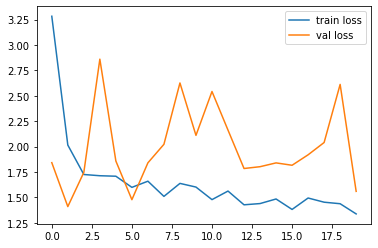

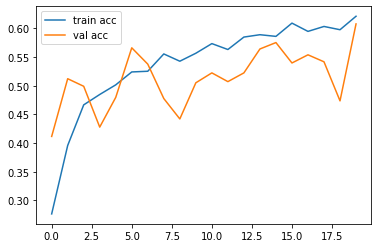

<Figure size 432x288 with 0 Axes>

In [18]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [21]:
from tensorflow.keras.preprocessing import image
img=image.load_img('/content/drive/MyDrive/Colab Notebooks/tomato/val/Tomato___Early_blight/00c5c908-fc25-4710-a109-db143da23112___RS_Erly.B 7778.JPG',target_size=(224,224))

In [22]:
x=image.img_to_array(img)
x

array([[[193., 180., 187.],
        [170., 157., 164.],
        [205., 192., 199.],
        ...,
        [177., 166., 174.],
        [189., 178., 186.],
        [174., 163., 171.]],

       [[162., 149., 156.],
        [161., 148., 155.],
        [171., 158., 165.],
        ...,
        [160., 149., 157.],
        [185., 174., 182.],
        [192., 181., 189.]],

       [[176., 163., 170.],
        [197., 184., 191.],
        [171., 158., 165.],
        ...,
        [176., 165., 173.],
        [185., 174., 182.],
        [168., 157., 165.]],

       ...,

       [[137., 117., 126.],
        [138., 118., 127.],
        [128., 108., 117.],
        ...,
        [137., 120., 130.],
        [123., 106., 116.],
        [115.,  98., 108.]],

       [[141., 121., 130.],
        [147., 127., 136.],
        [128., 108., 117.],
        ...,
        [138., 121., 131.],
        [146., 129., 139.],
        [122., 105., 115.]],

       [[139., 119., 128.],
        [130., 110., 119.],
        [113.,  

In [23]:
x.shape

(224, 224, 3)

In [24]:
x=x/255
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [25]:
from tensorflow.keras.models import load_model
model=load_model('/content/drive/My Drive/colab Notebooks/tomato_disease_model/tomato_model.h5')

In [26]:
model.predict(img_data)


array([[0.0000000e+00, 1.0000000e+00, 4.6905742e-23, 1.4747425e-26,
        1.3315873e-18, 0.0000000e+00, 2.2305089e-25, 0.0000000e+00,
        0.0000000e+00, 1.4674161e-11]], dtype=float32)

In [29]:
a=np.argmax(model.predict(img_data), axis=1)

In [30]:
a

array([1])

In [31]:
if a==0:
   print("infected - Tomato___Bacterial_spot")
if a==1:
   print("infected - Tomato___Early_blight")
if a==2:
   print("infected - Tomato___healthy")
if a==3:
   print("infected - Tomato___Late_blight")
if a==4:
   print("infected - Tomato___Leaf_Mold") 
if a==5:
   print("infected - Tomato___Septoria_leaf_spot")
if a==6:
   print("infected - Tomato___Spider_mites Two-spotted_spider_mite")
if a==7:
   print("infected - Tomato___Target_Spot") 
if a==8:
   print("infected - Tomato___Tomato_mosaic_virus")
if a==9:
   print("infected - Tomato___Tomato_Yellow_Leaf_Curl_Virus")   




            

infected - Tomato___Early_blight
